In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# data = pd.read_csv('selected_data.csv')
# data['GDatetime'] = pd.to_datetime(data['GDatetime'])
# data.set_index('GDatetime', inplace=True)
# data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,label,anomaly
GDatetime,,,,,,,,,,,,,,,,
2023-06-05 07:03:45,2.0,0.0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0,0,0
2023-06-05 07:03:46,2.0,0.0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0,0,0
2023-06-05 07:03:47,2.0,0.0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0,0,0
2023-06-05 07:03:48,2.0,0.0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0,0,0
2023-06-05 07:03:49,2.0,0.0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:16,2.0,10424.0,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.570007,11.092,2.656,59.970001,45.0,363,0
2023-07-01 16:27:17,2.0,10424.0,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0,363,0
2023-07-01 16:27:18,2.0,10424.0,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0,363,0


In [2]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, f1_score, roc_auc_score

def verification_train(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

def verification_test(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

    # def roc_auc(y, predict):
    fpr, tpr, _ = roc_curve(y, predict)
    auc = roc_auc_score(y, predict)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

In [3]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    # raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    # raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ', 'G_MRActP', 'G_MPF', 'G_ADC4', 'F_CuttingTime', 'F_OperationTime'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

# data['G_MP'] = data['G_MV'] * data['G_MA']
data.dropna(inplace=True)
data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:17,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:18,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:19,2,10424,0.0,0.0,712.0,21.0,37.099998,38.900002,0.0,220.960007,11.102,2.660,59.970001,45.0


In [4]:
def find_cycle_periods(data, threshold_low=100, threshold_high=10000, sub_cycle_threshold=1000, sub_cycle_length_minutes=50):
    cycle_starts = []
    cycle_ends = []
    in_cycle = False
    in_high = False
    in_sub_cycle = False
    label = -1 # 주기 라벨 (0부터 시작)
    
    # label 열을 추가하고 -1로 초기화
    data['label'] = 0
    sub_cycle_start_time = None
    sub_cycle_length = 0
    
    for i in range(len(data) - 1):
        value = data['F_CycleTime'].iloc[i]
        next_value = data['F_CycleTime'].iloc[i + 1]
        
        # 주기 시작 지점 찾기 (0 ~ 100 근처에서 올라가기 시작)
        if not in_cycle and value <= threshold_low:
            in_cycle = True
            label += 1 # 새로운 주기 시작, 라벨 증가
            cycle_starts.append(data.index[i]) # datetime 인덱스 사용
        
        # 주기 내부라면 현재 라벨로 표시
        if in_cycle:
            data['label'].iloc[i] = label

        # 1만 근처의 값에 도달
        if in_cycle and not in_high and value >= threshold_high:
            in_high = True

        # 1천 근처의 값에 도달
        if in_cycle and not in_high and value >= sub_cycle_threshold:
            in_sub_cycle = True
            if sub_cycle_start_time is None:
                sub_cycle_start_time = data.index[i]

        # 하위 주기의 끝 지점 찾기
        if in_sub_cycle and next_value <= threshold_low:
            sub_cycle_length += (data.index[i] - sub_cycle_start_time).seconds / 60
            sub_cycle_start_time = None
            if sub_cycle_length >= sub_cycle_length_minutes:
                in_high = True
            in_sub_cycle = False
            
        # 주기 끝 지점 찾기
        if in_high and next_value <= threshold_low:
            in_high = False
            in_cycle = False
            cycle_ends.append(data.index[i]) # datetime 인덱스 사용
            sub_cycle_length = 0
            
    # 마지막 주기의 끝 지점 처리
    if in_cycle:
        cycle_ends.append(data.index[-1])

    return cycle_starts, cycle_ends


# 함수를 다시 수정하여 지속 시간 10분간 값의 범위가 +-100 미만일 때, 조건이 시작된 시점부터 끝나기 직전까지의 행을 삭제하는 기능을 추가합니다.
def remove_constant_values(data, lower_bound=1000, upper_bound=12000, duration_minutes=3, variance=3):
    variance_start_time = None
    variance_start_index = None
    rows_to_drop = set()

    for i in range(len(data) - 1):
        value = data['F_CycleTime'].iloc[i]
        next_value = data['F_CycleTime'].iloc[i + 1]
        current_time = data.index[i]
        next_time = data.index[i + 1]

        # 값의 변동이 +- 100 미만인 경우
        if abs(next_value - value) < variance:
            if variance_start_time is None:
                variance_start_time = current_time
                variance_start_index = i
            # 지속 시간이 5분 이상인 경우
            if (next_time - variance_start_time).seconds / 60 >= duration_minutes:
                rows_to_drop.update(range(variance_start_index, i + 1))
        else:
            variance_start_time = None
            variance_start_index = None

    # 행 삭제
    data.drop(data.index[list(rows_to_drop)], inplace=True)
    return data


selected_data = data

selected_data = remove_constant_values(selected_data)

# 중복된 인덱스를 가진 행의 평균값으로 병합
selected_data = selected_data.groupby(selected_data.index).mean()

cycle_starts, cycle_ends = find_cycle_periods(selected_data)

selected_data = selected_data.iloc[:-1]
selected_data['anomaly'] = 0
specific_labels = [43, 188, 243, 256, 258, 270, 291, 295, 325, 340, 349, 360]
selected_data.loc[selected_data['label'].isin(specific_labels), 'anomaly'] = 1

In [26]:
selected_col = selected_data[['F_CycleTime', 'G_ADC3', 'G_MActP', 'F_SpindleRPM1', 'G_MTemp', 'anomaly']]

# # 'value' 열을 기준으로 그룹화하고, 각 그룹의 표준편차를 계산
# std_df = selected_col.groupby('label').transform('std')
# mean_df = selected_col.groupby('label').transform('mean')
# skew_df = selected_col.groupby('label').transform('skew')
# data_new_col = selected_col.copy()

# # 결과를 새로운 열로 추가
# for col in std_df.columns[:-1]:
#     data_new_col[f'std_{col}'] = std_df[col]

# for col in mean_df.columns[:-1]:
#     data_new_col[f'mean{col}'] = mean_df[col]

# for col in skew_df.columns[:-1]:
#     data_new_col[f'skew_{col}'] = skew_df[col]


# data_new_col = pd.concat([data_new_col, selected_col.iloc[:,-1]], axis=1)
# data_new_col

In [27]:
# 최대 샘플 길이를 정의 (선택적)
max_length = max(len(selected_col.loc[start:end]) for start, end in zip(cycle_starts, cycle_ends))

def create_3d_array(data, cycle_starts, cycle_ends, max_length=None):
    # data의 현재 열을 feature_columns로 사용
    feature_columns = data.columns
    
    # 주기별 샘플을 저장할 리스트
    samples = []

    # 각 주기를 샘플로 변환
    for start, end in zip(cycle_starts, cycle_ends):
        sample = data.loc[start:end][feature_columns].values
        
        # 샘플 길이 통일 (선택적)
        if max_length:
            if len(sample) > max_length:
                sample = sample[:max_length]
            elif len(sample) < max_length:
                padding = np.zeros((max_length - len(sample), sample.shape[1]))
                sample = np.vstack((sample, padding))

        
        samples.append(sample)

    # 샘플들을 3차원 배열로 쌓기
    samples_array = np.stack(samples)
    
    return samples_array

# 3차원 배열 생성
samples_array = create_3d_array(selected_col, cycle_starts, cycle_ends, max_length=max_length)

# 결과의 형태 출력
X = samples_array[:,:,:-1]
y = samples_array[:,0,-1]
X.shape, y.shape

((364, 5570, 5), (364,))

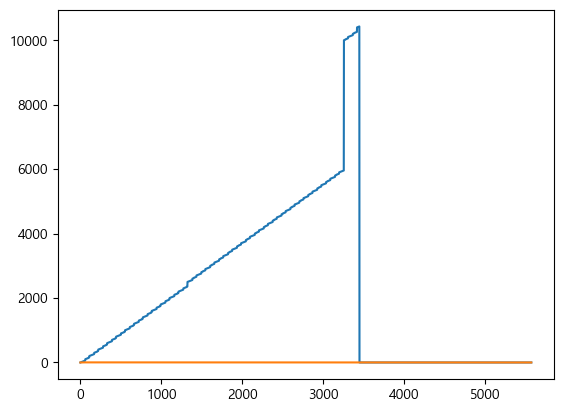

In [28]:
plt.plot(samples_array[8,:,:2])

In [29]:
train = samples_array[:260]
X_train = train[:,:,:-1]
y_train = train[:,0,-1]

test = samples_array[260:]
y_test = test[:,0,-1]
X_test = test[:,:,:-1]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(260, 5570, 5) (260,)
(104, 5570, 5) (104,)


In [33]:
X_train_sc.shape

(260, 5570, 5)

In [30]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_sc = []
X_test_sc = []

# shuffle
X_train = shuffle(X_train, random_state=42)
X_test = shuffle(X_test, random_state=42)

# 학습 데이터 변환
for sample in X_train:
    std_sample = std.fit_transform(sample)
    X_train_sc.append(std_sample)

# 테스트 데이터 변환
for sample in X_test:
    std_sample = std.transform(sample)
    X_test_sc.append(std_sample)

# NumPy 배열로 변환
X_train_sc = np.array(X_train_sc)
X_test_sc = np.array(X_test_sc)

In [34]:
X_test_sc.shape, X_train_sc.shape

((104, 5570, 5), (260, 5570, 5))

In [55]:
from tensorflow.keras.layers import Input, Conv1D, Activation, GlobalAveragePooling1D, Dense, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
import tensorflow as tf

init = tf.keras.initializers.RandomNormal(stddev = 0.02, seed = 0)

# 수정된 모델 코드
# 입력 레이어
inputs = Input(shape=(X_train_sc.shape[1], X_train_sc.shape[2]))

# 첫 번째 Conv1D 블록
x = Conv1D(32, 8, padding='same', strides=1, kernel_initializer=init)(inputs)
x = BatchNormalization()(x)
x = Activation('tanh')(x)
x = MaxPooling1D(1, strides=2)(x)

# 두 번째 Conv1D 블록
x = Conv1D(64, 4, strides=1, kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)
x = MaxPooling1D(1, strides=2)(x)

# 두 번째 Conv1D 블록
x = Conv1D(128, 4, padding='same', strides=1, kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)
x = MaxPooling1D(1, strides=2)(x)

# 세 번째 Conv1D 블록 (추가)
x = Conv1D(256, 4, strides=1, kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)
x = MaxPooling1D(1, strides=2)(x)

# 글로벌 평균 풀링
x = GlobalAveragePooling1D()(x)

# 첫 번째 Dense 블록
x1 = Dense(124)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('tanh')(x1)
x1 = Dropout(0.5)(x1)  # 드롭아웃 비율 증가

# 첫 번째 Dense 블록
x1 = Dense(64)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('tanh')(x1)
x1 = Dropout(0.5)(x1)  # 드롭아웃 비율 증가

# 첫 번째 Dense 블록
x1 = Dense(32)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('tanh')(x1)
x1 = Dropout(0.5)(x1)  # 드롭아웃 비율 증가


# 출력 레이어
outputs1 = Dense(1, activation='sigmoid', name="abnormal_output")(x1)

# 모델 컴파일
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs1)

model.compile(loss='binary_crossentropy', optimizer=opt)

# 모델 요약
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 5570, 5)]         0         
                                                                 
 conv1d_20 (Conv1D)          (None, 5570, 32)          1312      
                                                                 
 batch_normalization_35 (Bat  (None, 5570, 32)         128       
 chNormalization)                                                
                                                                 
 activation_35 (Activation)  (None, 5570, 32)          0         
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 2785, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 2782, 64)          8256

In [49]:
X_train_sc.shape

(260, 5570, 5)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train_sc, y_train, validation_split=0.2, batch_size=32, epochs=200, callbacks=[es_callback], class_weight={0:1, 1:99})

Epoch 1/200
7/7 [==============================] - 2s 129ms/step - loss: 1.1447 - val_loss: 0.6934
Epoch 2/200
7/7 [==============================] - 1s 87ms/step - loss: 0.8963 - val_loss: 0.6908
Epoch 3/200
7/7 [==============================] - 1s 88ms/step - loss: 0.8394 - val_loss: 0.6876
Epoch 4/200
7/7 [==============================] - 1s 87ms/step - loss: 0.8163 - val_loss: 0.6840
Epoch 5/200
7/7 [==============================] - 1s 86ms/step - loss: 0.8933 - val_loss: 0.6787
Epoch 6/200
7/7 [==============================] - 1s 87ms/step - loss: 0.8286 - val_loss: 0.6739
Epoch 7/200
7/7 [==============================] - 1s 87ms/step - loss: 0.7159 - val_loss: 0.6722
Epoch 8/200
7/7 [==============================] - 1s 86ms/step - loss: 0.7455 - val_loss: 0.6731
Epoch 9/200
7/7 [==============================] - 1s 86ms/step - loss: 0.7102 - val_loss: 0.6744
Epoch 10/200
7/7 [==============================] - 1s 86ms/step - loss: 0.7006 - val_loss: 0.6777
Epoch 11/200
7/7 [

4/4 [==============================] - 0s 108ms/step


<Axes: ylabel='Count'>

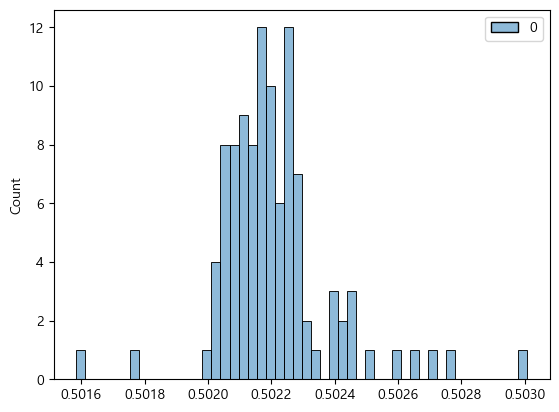

In [51]:
p_test = model.predict(X_test_sc)
sns.histplot(p_test, bins=50)

Train Accuracy  :  0.5769230769230769
f1 score        :  0.18518518518518517
Recall Score    :  0.7142857142857143
precision score :  0.10638297872340426
confusion matrix : ------------------
 [[55 42]
 [ 2  5]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

         0.0       0.96      0.57      0.71        97
         1.0       0.11      0.71      0.19         7

    accuracy                           0.58       104
   macro avg       0.54      0.64      0.45       104
weighted avg       0.91      0.58      0.68       104



<Figure size 640x480 with 0 Axes>

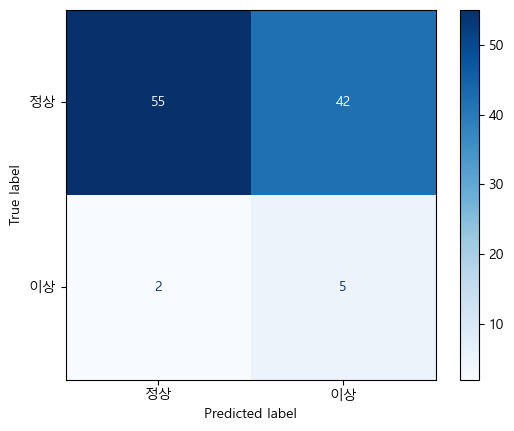

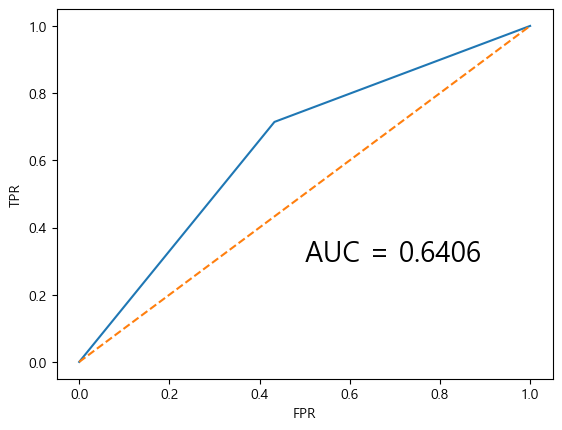

In [54]:
p_test_bin = p_test>=0.5022

verification_test(y_test, p_test_bin)

In [10]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

seq_len = X_train_sc.shape[1]
n_channels = X_train_sc.shape[2]

# 입력 레이어
inputs = layers.Input(shape=(seq_len, n_channels))

# 인코더
x = layers.Conv1D(64, 10, activation='gelu', padding='same', strides=2)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv1D(128, 7, activation='gelu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

encoded = layers.Conv1D(128, 5, activation='gelu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# 디코더
x = layers.Conv1DTranspose(128, 5, activation='gelu', padding='same', strides=2)(encoded)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv1DTranspose(64, 7, activation='gelu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

decoded = layers.Conv1DTranspose(11, 10, activation='gelu', padding='same', strides=2)(x)

# 분류를 위한 레이어 추가
x = layers.GlobalMaxPooling1D()(decoded)

x = layers.Dense(64, activation='gelu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

x = layers.Dense(32, activation='gelu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=50, min_lr=0.001)

callbacks = [early_stopping]

# 모델 구조 출력
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6137, 8)]         0         
                                                                 
 conv1d (Conv1D)             (None, 3069, 64)          5184      
                                                                 
 batch_normalization (BatchN  (None, 3069, 64)         256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3069, 64)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1535, 128)         57472     
                                                                 
 batch_normalization_1 (Batc  (None, 1535, 128)        512       
 hNormalization)                                             

In [11]:
class_weights = {0:1, 1:99}

history = model.fit(X_train_sc, y_train, validation_split=0.2, batch_size=32, epochs=500, callbacks=[callbacks], class_weight=class_weights)

Epoch 1/500
7/7 [==============================] - 7s 309ms/step - loss: 2.2837 - acc: 0.5144 - val_loss: 1.3115 - val_acc: 0.0577
Epoch 2/500
7/7 [==============================] - 1s 167ms/step - loss: 2.4061 - acc: 0.5096 - val_loss: 1.2737 - val_acc: 0.9423
Epoch 3/500
7/7 [==============================] - 1s 167ms/step - loss: 1.6715 - acc: 0.5433 - val_loss: 1.2160 - val_acc: 0.9423
Epoch 4/500
7/7 [==============================] - 1s 166ms/step - loss: 1.7726 - acc: 0.4904 - val_loss: 1.1518 - val_acc: 0.9423
Epoch 5/500
7/7 [==============================] - 1s 167ms/step - loss: 3.6946 - acc: 0.5000 - val_loss: 1.0874 - val_acc: 0.9423
Epoch 6/500
7/7 [==============================] - 1s 167ms/step - loss: 2.3718 - acc: 0.5385 - val_loss: 1.0311 - val_acc: 0.9423
Epoch 7/500
7/7 [==============================] - 1s 168ms/step - loss: 1.8613 - acc: 0.5721 - val_loss: 0.9789 - val_acc: 0.9423
Epoch 8/500
7/7 [==============================] - 1s 167ms/step - loss: 1.7787 - a

In [12]:
p_test = model.predict(X_test_sc)
p_test.shape

4/4 [==============================] - 1s 163ms/step


(104, 1)

Train Accuracy  :  0.75
f1 score        :  0.2777777777777778
Recall Score    :  0.7142857142857143
precision score :  0.1724137931034483
confusion matrix : ------------------
 [[73 24]
 [ 2  5]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85        97
         1.0       0.17      0.71      0.28         7

    accuracy                           0.75       104
   macro avg       0.57      0.73      0.56       104
weighted avg       0.92      0.75      0.81       104



<Figure size 640x480 with 0 Axes>

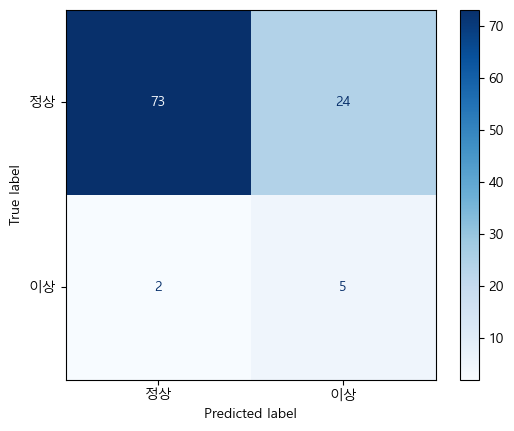

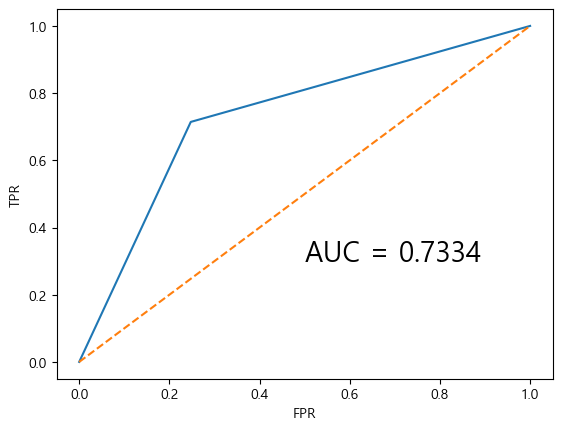

In [20]:
p_test_bin = p_test>=0.1

verification_test(y_test, p_test_bin)

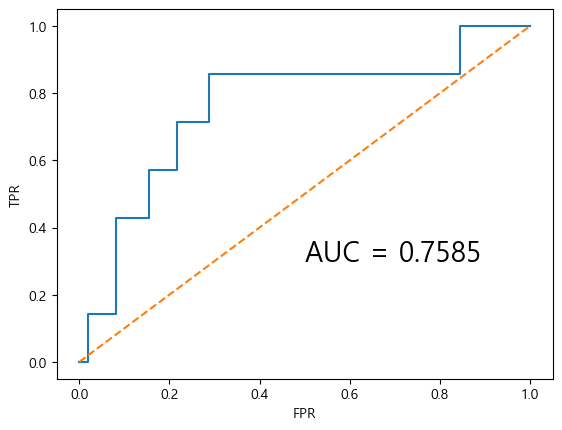

In [21]:
fpr, tpr, _ = roc_curve(y_test, p_test)
auc = roc_auc_score(y_test, p_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [27]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

seq_len = X_train_sc.shape[1]
n_channels = X_train_sc.shape[2]

# 입력 레이어
inputs = layers.Input(shape=(seq_len, n_channels))

# 인코더
x = layers.Conv1D(64, 10, activation='relu', padding='same', strides=2)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv1D(128, 7, activation='relu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

encoded = layers.Conv1D(128, 5, activation='relu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# 디코더
x = layers.Conv1DTranspose(128, 5, activation='relu', padding='same', strides=2)(encoded)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv1DTranspose(64, 7, activation='relu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

decoded = layers.Conv1DTranspose(11, 10, activation='relu', padding='same', strides=2)(x)

# 분류를 위한 레이어 추가
x = layers.GlobalMaxPooling1D()(decoded)

x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=0.001)

callbacks = [early_stopping, reduce_lr]

# 모델 구조 출력
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6137, 8)]         0         
                                                                 
 conv1d_6 (Conv1D)           (None, 3069, 64)          5184      
                                                                 
 batch_normalization_14 (Bat  (None, 3069, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 3069, 64)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 1535, 128)         57472     
                                                                 
 batch_normalization_15 (Bat  (None, 1535, 128)        512       
 chNormalization)                                          

In [28]:
# es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_sc, y_train, validation_split=0.2, batch_size=32, epochs=300, callbacks=[callbacks])

Epoch 1/300
7/7 [==============================] - 2s 159ms/step - loss: 1.4801 - acc: 0.5150 - val_loss: 1.2541 - val_acc: 0.9800 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 1s 129ms/step - loss: 1.4445 - acc: 0.5300 - val_loss: 1.2145 - val_acc: 0.9800 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 1s 129ms/step - loss: 1.4349 - acc: 0.5500 - val_loss: 1.2019 - val_acc: 0.9800 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 1s 129ms/step - loss: 1.3232 - acc: 0.5700 - val_loss: 1.1954 - val_acc: 0.9800 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 1s 129ms/step - loss: 1.3599 - acc: 0.6550 - val_loss: 1.1737 - val_acc: 0.9800 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 1s 129ms/step - loss: 1.3787 - acc: 0.5250 - val_loss: 1.1450 - val_acc: 0.9800 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 1s 128ms/step - loss: 1.2910 - acc: 0.6000 - val_loss: 1.1151 - val_acc: 0.9800 - lr:

In [29]:
p_test = model.predict(X_test_sc)
p_test.shape

4/4 [==============================] - 0s 118ms/step


(114, 1)

정확도     : 0.8947368421052632
f1        : 0.0
recall    : 0.0
precision : 0.0


<Figure size 640x480 with 0 Axes>

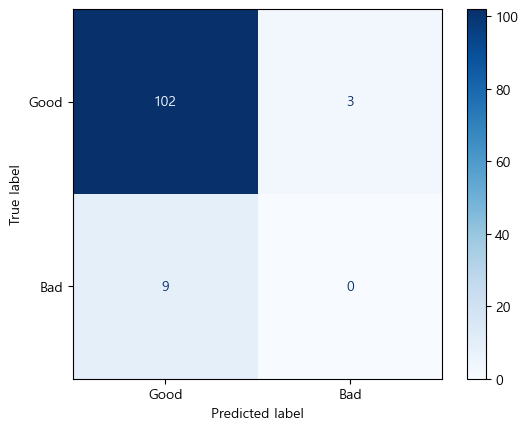

In [31]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, recall_score, precision_score

p_val_bin = p_test>=0.1

print('정확도     :', accuracy_score(y_test, p_val_bin))
print('f1        :', f1_score(y_test, p_val_bin))
print('recall    :', recall_score(y_test, p_val_bin))
print('precision :', precision_score(y_test, p_val_bin))


plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, p_val_bin), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# 모델 생성
model = Sequential()

# 입력 레이어
model.add(Conv1D(filters=16, kernel_size=3, activation='gelu', input_shape=(7005, X_train_sc.shape[2])))
model.add(BatchNormalization())

# Conv1D 레이어와 MaxPooling 레이어 추가
model.add(Conv1D(filters=32, kernel_size=3, activation='gelu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=3, activation='gelu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=128, kernel_size=3, activation='gelu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Dropout 레이어
model.add(Dropout(0.5))

# 평탄화
model.add(Flatten())

# 완전 연결 레이어 (Dense)
model.add(Dense(256, activation='gelu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='gelu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 출력 레이어
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 구조 출력
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_52 (Conv1D)          (None, 7003, 16)          544       
                                                                 
 batch_normalization_82 (Bat  (None, 7003, 16)         64        
 chNormalization)                                                
                                                                 
 conv1d_53 (Conv1D)          (None, 7001, 32)          1568      
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 3500, 32)         0         
 g1D)                                                            
                                                                 
 batch_normalization_83 (Bat  (None, 3500, 32)         128       
 chNormalization)                                                
                                                      

In [100]:
es_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(X_train_sc, y_train, validation_split=0.2, batch_size=32, epochs=500, callbacks=[es_callback])

Epoch 1/500


ResourceExhaustedError: Graph execution error:

OOM when allocating tensor with shape[32,1,7001,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_8/conv1d_53/Conv1D-0-1-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_174434]

In [94]:
p_test = model.predict(X_test_sc)
p_test.shape

4/4 [==============================] - 0s 116ms/step


(114, 1)

Train Accuracy  :  0.07894736842105263
f1 score        :  0.14634146341463414
Recall Score    :  1.0
precision score :  0.07894736842105263
confusion matrix : ------------------
 [[  0 105]
 [  0   9]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       105
         1.0       0.08      1.00      0.15         9

    accuracy                           0.08       114
   macro avg       0.04      0.50      0.07       114
weighted avg       0.01      0.08      0.01       114



<Figure size 640x480 with 0 Axes>

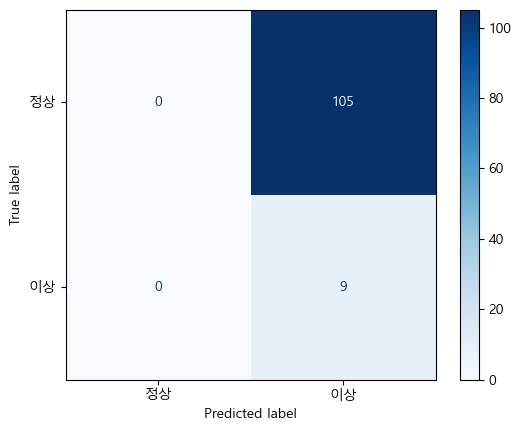

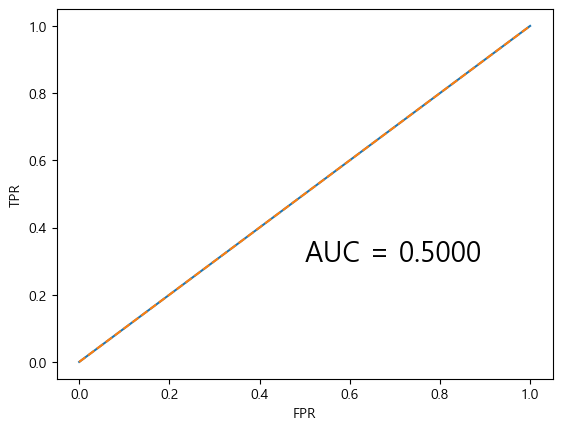

In [95]:
p_test_bin = p_test>=0.005
verification_test(y_test, p_test_bin)

In [12]:
X_train_sc.shape

(260, 6137, 40)

In [20]:
X_test_pred = model.predict(X_test_sc)

4/4 [==============================] - 1s 255ms/step


Train Accuracy  :  0.5865384615384616
f1 score        :  0.0
Recall Score    :  0.0
precision score :  0.0
confusion matrix : ------------------
 [[61 36]
 [ 7  0]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74        97
         1.0       0.00      0.00      0.00         7

    accuracy                           0.59       104
   macro avg       0.45      0.31      0.37       104
weighted avg       0.84      0.59      0.69       104



<Figure size 640x480 with 0 Axes>

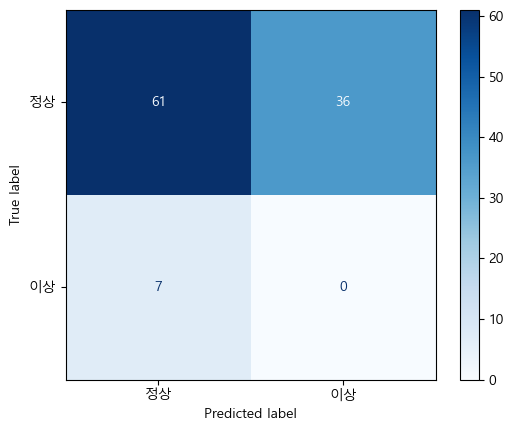

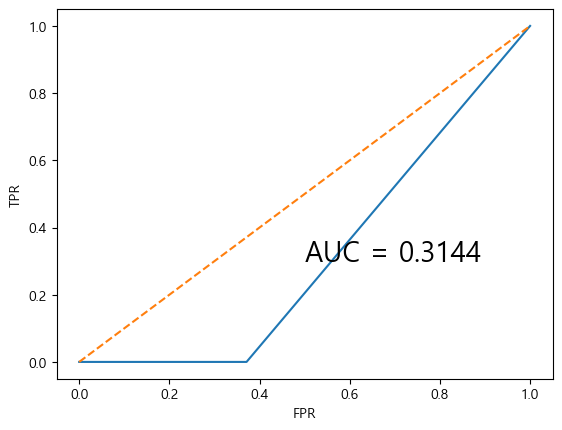

In [26]:
p_test_bin = X_test_pred>=0.2
verification_test(y_test, p_test_bin)